# Credit Card Fraud Detection and ANNs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from statistics import mean 

# Importing datasets

In [3]:
card = pd.read_csv("creditcard.csv")
card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


1. Randomly shuffle the dataset by taking a random seed of “42”.

Create a testing set from the last 20% rows of the dataframe (these must be the same for all the students). The remaining rows will be the training + validation set, with training : validation ratio of 80% : 20%.

In [4]:
df1 = card.sample(frac=1,random_state=42).reset_index(drop=True)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
284803,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
284804,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
284805,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [5]:
train1, test = train_test_split(df1, random_state=0, train_size = .80)
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,164319.0,2.045110,0.281164,-1.994865,1.126769,0.882753,-0.784245,0.744507,-0.372623,-0.286801,...,0.172624,0.691321,-0.164714,-0.457358,0.660602,-0.378389,-0.032274,-0.080590,9.99,0
255448,69315.0,-0.456222,-0.017791,0.582910,-0.554266,-0.492252,0.302138,-0.776140,-2.730180,0.000967,...,-1.231744,0.120533,-0.304555,-0.359545,0.593187,0.934891,-0.023852,0.264858,210.00,0
244749,141142.0,1.837144,0.126164,0.264309,3.906227,-0.460716,0.287271,-0.625616,0.204811,-0.049254,...,0.224470,0.697652,0.165437,-0.062936,-0.250505,0.093982,0.009203,-0.033730,15.16,0
63919,141637.0,1.664005,-0.675071,-1.776527,-0.040978,1.142514,1.840676,-0.187824,0.458484,0.434333,...,0.516130,1.558189,-0.056632,-0.999548,0.036535,0.069613,0.031590,-0.061499,111.50,0
11475,168530.0,-0.689161,0.912338,0.922190,-0.696674,0.238813,0.716366,-0.039777,0.509954,0.381325,...,0.243830,0.975549,-0.308117,0.128849,-0.139106,-0.207860,0.014824,-0.061140,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236778,83163.0,1.097750,-0.001266,0.894164,1.028304,-0.425981,0.430313,-0.544114,0.310559,0.175201,...,0.040959,0.091612,0.011728,-0.347132,0.243962,-0.426543,0.058913,0.022663,19.50,0
127073,32634.0,-1.486155,1.312707,-0.578545,0.721771,0.514020,-0.204180,0.136713,0.650843,-0.075900,...,0.093177,0.801619,-0.044243,-0.287569,-0.807101,-0.411062,0.261197,-0.216899,1.00,0
208502,138313.0,-0.748073,-1.209636,0.887484,-1.655591,-0.065690,0.957387,0.277554,0.327990,-0.835489,...,0.077620,-0.161395,0.725481,-1.080008,-0.305991,-0.477772,-0.028670,-0.003467,229.54,0
263323,128171.0,-1.397596,0.518986,1.743178,-0.285403,-1.218557,0.204609,0.455112,0.580430,0.218665,...,0.159317,0.208948,0.149521,-0.115119,0.497864,-0.204712,0.152499,0.090935,195.34,0


# splitting data into training and validation

In [6]:
train, valid = train_test_split(train1, test_size=.80, random_state=42)
valid

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27325,133230.0,0.076588,1.045554,-1.078269,0.027139,0.175636,-1.303074,0.936198,0.004175,-0.388199,...,0.387979,1.051819,0.071051,0.003717,-0.194947,-0.159311,-0.086168,-0.038301,85.25,0
244450,38300.0,-1.481973,0.408797,1.277036,-2.673918,-0.529742,-1.527875,0.363266,0.152322,-0.937374,...,-0.633513,-1.304503,0.065331,0.337306,0.319941,1.034970,-0.028332,-0.159852,3.41,0
8508,139069.0,2.163089,-0.632538,-2.122664,-0.864770,-0.078605,-1.698353,0.355096,-0.634919,-1.003637,...,0.384566,1.016552,-0.121196,-0.011381,0.428715,0.080698,-0.085307,-0.072161,68.80,0
180716,139678.0,1.982217,-0.545033,-0.217713,0.523094,-0.995513,-0.644211,-0.736548,0.011340,1.460209,...,0.148390,0.587372,0.179764,0.069549,-0.327095,0.570032,-0.027823,-0.049020,11.50,0
67200,82106.0,-6.105284,5.041056,-1.783360,-2.428778,-1.988313,-0.818265,-0.974310,1.791962,3.393229,...,-0.512528,-0.566359,0.425311,-0.046148,0.781403,0.837346,1.991608,1.157790,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56014,112454.0,2.313796,-1.428520,-1.330129,-1.812750,-0.823898,-0.164346,-1.108120,-0.088658,-1.387118,...,-0.184645,-0.063897,0.077711,-1.120615,-0.065544,-0.113634,0.000314,-0.071198,25.00,0
232973,77147.0,1.196153,-0.427972,0.865781,0.342416,-0.782873,0.472569,-0.819778,0.221099,-1.072999,...,-0.346069,-0.535855,0.091585,-0.356391,0.156673,-0.464156,0.085631,0.030425,28.89,0
72445,36269.0,-1.434049,0.499081,1.674575,-0.064139,0.506985,0.040608,0.717814,-0.149492,0.618442,...,-0.353047,-0.084375,0.051580,0.028949,-0.038400,0.213696,0.173059,-0.173006,14.90,0
268006,54124.0,-1.142914,0.607590,0.755223,1.237829,0.161282,-0.223914,0.078516,0.585859,-0.564747,...,0.254424,0.489812,-0.026174,-0.296947,-0.153028,-0.150269,0.290277,0.064468,59.40,0


In [7]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
197626,155806.0,-0.231006,1.026267,-0.525893,-0.778551,0.525433,-0.594353,0.601363,0.323918,-0.039456,...,-0.291217,-0.830185,0.017211,-1.030813,-0.347248,0.207321,0.114204,0.022850,8.99,0
129768,121177.0,-1.701392,0.268366,0.454324,-2.882388,0.295267,0.410695,0.578953,0.232859,1.361532,...,0.025793,0.713733,-0.177040,-0.024090,0.135511,0.552914,0.666909,0.537985,110.00,0
179415,115312.0,2.100643,-0.890907,-1.241164,-0.925167,-0.731620,-1.132733,-0.432156,-0.264799,-0.705083,...,0.523071,1.396597,-0.042149,0.131402,0.120520,0.047470,-0.048771,-0.068050,50.85,0
133101,47259.0,-1.035334,0.153075,2.025733,-1.590067,-0.421788,-1.348038,0.812715,-0.104834,0.877597,...,-0.112070,-0.351792,-0.050658,0.904587,0.585236,-0.961278,0.051767,0.081895,69.95,0
101404,122268.0,-0.409870,1.095405,-0.893002,1.049154,1.029250,-0.110259,1.843536,-0.075615,-0.964121,...,0.160701,0.444572,0.071744,0.557687,0.053343,-0.430459,0.393350,0.282783,160.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265860,124961.0,-1.068541,0.638427,-0.900262,-3.462409,-0.520465,-1.067876,-0.117155,0.611395,-0.192716,...,0.049252,0.763812,-0.222804,0.639134,0.130372,-0.039738,0.297924,0.162552,15.13,0
4791,40567.0,-1.580191,-0.612761,1.984571,0.617893,1.352758,-1.076075,-0.065272,-0.089887,0.125050,...,0.072579,0.461480,-0.268862,0.571181,0.008654,-0.532249,-0.118914,0.007345,10.00,0
69488,40749.0,1.292903,0.223966,-0.176651,0.310085,0.199212,-0.094105,-0.081533,0.052923,-0.053641,...,-0.319098,-0.983837,-0.021106,-0.894859,0.320516,0.151335,-0.032688,0.007677,2.97,0
254747,132860.0,-1.514187,1.966368,0.310262,0.990730,-0.759171,1.751649,-2.889070,-6.667938,0.006346,...,-0.745711,1.534809,0.340536,-0.637117,-0.519777,0.283419,0.572790,0.323500,27.77,0


Determine number of rows in training, validation and test sets, along with the structure, datatypes and value counts of the dataframes.

In [10]:
print("Rows of train datasets: ",len(train.axes[0]))
print("Rows of test datasets: ",len(test.axes[0]))
print("Rows of validation datasets: ",len(valid.axes[0]),"\n")
print("Structure of train datasets:\n")
print(train.info())
print("\nStructure of test datasets:\n")
print(test.info())
print("\nStructure of validation datasets:\n")
print(valid.info())
print("\nDatatype of train datasets:\n")
print(train.dtypes)
print("\nDatatype of test datasets:\n")
print(test.dtypes)
print("\nDatatype of validation datasets:\n")
print(valid.dtypes)
print("\nValue Count of train datasets:\n")
print(train.count())
print("\nValue Count of test datasets:\n")
print(test.count())
print("\nValue Count of validation datasets:\n")
print(valid.count())

Rows of train datasets:  45569
Rows of test datasets:  56962
Rows of validation datasets:  182276 

Structure of train datasets:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45569 entries, 197626 to 168957
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45569 non-null  float64
 1   V1      45569 non-null  float64
 2   V2      45569 non-null  float64
 3   V3      45569 non-null  float64
 4   V4      45569 non-null  float64
 5   V5      45569 non-null  float64
 6   V6      45569 non-null  float64
 7   V7      45569 non-null  float64
 8   V8      45569 non-null  float64
 9   V9      45569 non-null  float64
 10  V10     45569 non-null  float64
 11  V11     45569 non-null  float64
 12  V12     45569 non-null  float64
 13  V13     45569 non-null  float64
 14  V14     45569 non-null  float64
 15  V15     45569 non-null  float64
 16  V16     45569 non-null  float64
 17  V17     45569 non-null  float64
 18  V18     45

# Data Cleaning:

1. Analyse the data.


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


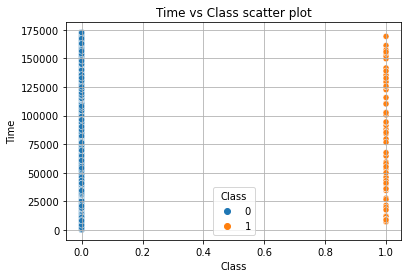

In [26]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(train["Class"],train["Time"],hue=train["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Amount vs Class scatter plot')

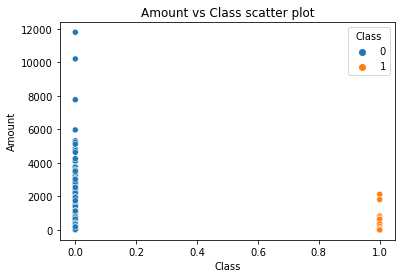

In [23]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(train["Class"],train["Amount"],hue=train["Class"])
plt.title("Amount vs Class scatter plot")

Text(0, 0.5, 'Transaction')

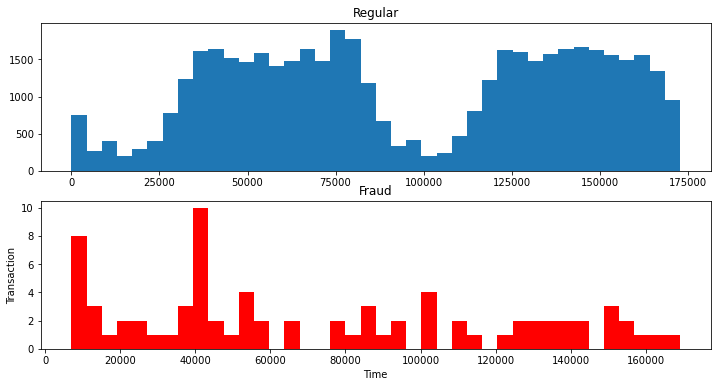

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
ax[0].hist(train['Time'][train['Class']==0], bins = 40)
ax[1].hist(train['Time'][train['Class']==1], bins = 40, color= 'red')
ax[0].set_title("Regular")
ax[1].set_title("Fraud")
plt.xlabel('Time')
plt.ylabel('Transaction')

2. Check for missing values and logically impute the dataset. Normalize the columns.

In [37]:
print(card.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [38]:
test.duplicated().any()

True

In [39]:
test.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,164319.0,2.045110,0.281164,-1.994865,1.126769,0.882753,-0.784245,0.744507,-0.372623,-0.286801,...,0.172624,0.691321,-0.164714,-0.457358,0.660602,-0.378389,-0.032274,-0.080590,9.99,0
255448,69315.0,-0.456222,-0.017791,0.582910,-0.554266,-0.492252,0.302138,-0.776140,-2.730180,0.000967,...,-1.231744,0.120533,-0.304555,-0.359545,0.593187,0.934891,-0.023852,0.264858,210.00,0
244749,141142.0,1.837144,0.126164,0.264309,3.906227,-0.460716,0.287271,-0.625616,0.204811,-0.049254,...,0.224470,0.697652,0.165437,-0.062936,-0.250505,0.093982,0.009203,-0.033730,15.16,0
63919,141637.0,1.664005,-0.675071,-1.776527,-0.040978,1.142514,1.840676,-0.187824,0.458484,0.434333,...,0.516130,1.558189,-0.056632,-0.999548,0.036535,0.069613,0.031590,-0.061499,111.50,0
11475,168530.0,-0.689161,0.912338,0.922190,-0.696674,0.238813,0.716366,-0.039777,0.509954,0.381325,...,0.243830,0.975549,-0.308117,0.128849,-0.139106,-0.207860,0.014824,-0.061140,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236778,83163.0,1.097750,-0.001266,0.894164,1.028304,-0.425981,0.430313,-0.544114,0.310559,0.175201,...,0.040959,0.091612,0.011728,-0.347132,0.243962,-0.426543,0.058913,0.022663,19.50,0
127073,32634.0,-1.486155,1.312707,-0.578545,0.721771,0.514020,-0.204180,0.136713,0.650843,-0.075900,...,0.093177,0.801619,-0.044243,-0.287569,-0.807101,-0.411062,0.261197,-0.216899,1.00,0
208502,138313.0,-0.748073,-1.209636,0.887484,-1.655591,-0.065690,0.957387,0.277554,0.327990,-0.835489,...,0.077620,-0.161395,0.725481,-1.080008,-0.305991,-0.477772,-0.028670,-0.003467,229.54,0
263323,128171.0,-1.397596,0.518986,1.743178,-0.285403,-1.218557,0.204609,0.455112,0.580430,0.218665,...,0.159317,0.208948,0.149521,-0.115119,0.497864,-0.204712,0.152499,0.090935,195.34,0


No null or duplicate values are there.

# Classification:

1. Train a logistic regression model on the training set partition by taking all the features. Calculate the error on the validation set.

In [68]:
features = np.array(train.columns)
X = train.loc[:, features]
y = train.loc[:, ['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, train_size = .80)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_valid)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
accuracy=metrics.accuracy_score(y_valid,pred)
print("Accuracy: ",round(accuracy*100, 2),"%")

Accuracy:  99.86 %


In [74]:
from sklearn.metrics import mean_squared_error
validation_error = mean_squared_error(y_test,pred)
print("Validation error: ", validation_error)

Validation error:  0.0014263770024138687


2. Train a neural network model (MLPClassifier) by taking all the features and predicting the result. Fix the random_state for training. Choose the solver as ‘adam’, and set the number of hidden layers to (10, 2). Vary the hidden layers to find the best set of results on validation set. Explore different training parameters of MLP.

In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# hidden layer (10, 2)

In [89]:
mlp = MLPClassifier(hidden_layer_sizes=(10,2),max_iter = 10,activation = 'relu',solver = 'adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
accuracy=metrics.accuracy_score(y_valid,y_pred)
print("Accuracy: ",round(accuracy*100, 2),"%")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  99.82 %


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


# hidden layer (5,2)

In [105]:
mlp = MLPClassifier(hidden_layer_sizes=(10,2),max_iter = 300,activation = 'relu',solver = 'adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
accuracy=metrics.accuracy_score(y_valid,y_pred)
print("Accuracy: ",round(accuracy*100, 2),"%")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  99.82 %


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9098
           1       0.00      0.00      0.00        16

    accuracy                           1.00      9114
   macro avg       0.50      0.50      0.50      9114
weighted avg       1.00      1.00      1.00      9114



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Find the evaluation scores by constructing the confusion matrix (True Positive, False positive, True Negative and False Negatives). Precision = TP/(TP+FP), Recall = TP/(TP+FN)

Precision:  0.0017555409260478386 Recall:  0.0


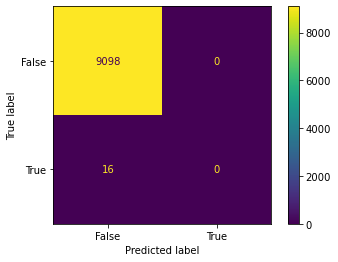

In [113]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cn, display_labels=[False,True])
cn_display.plot()
precision=metrics.average_precision_score(y_test,y_pred)
recall=metrics.recall_score(y_test,y_pred)
print("Precision: ", precision, "Recall: ", recall)

4. Plot the precision and recall values on the same plot for different training iterations for the MLP model by varying max_iter as 25, 50, 75, ….

# iteration = 25

In [122]:
mlp = MLPClassifier(hidden_layer_sizes=(10,2),max_iter = 25,activation = 'relu',solver = 'adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
precision=metrics.average_precision_score(y_valid,y_pred)
recall=metrics.recall_score(y_valid,y_pred)
print("Precision: ", precision, "Recall: ", recall)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision:  0.0017555409260478386 Recall:  0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


# iteration = 50

In [123]:
mlp = MLPClassifier(hidden_layer_sizes=(10,2),max_iter = 50,activation = 'relu',solver = 'adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
precision=metrics.average_precision_score(y_valid,y_pred)
recall=metrics.recall_score(y_valid,y_pred)
print("Precision: ", precision, "Recall: ", recall)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision:  0.0017555409260478386 Recall:  0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# iteration = 75

In [124]:
mlp = MLPClassifier(hidden_layer_sizes=(10,2),max_iter = 75,activation = 'relu',solver = 'adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)
precision=metrics.average_precision_score(y_valid,y_pred)
recall=metrics.recall_score(y_valid,y_pred)
print("Precision: ", precision, "Recall: ", recall)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Precision:  0.0017555409260478386 Recall:  0.0


5. Make predictions on the test set by taking 3 of your best models. Report these 3 accuracy values.

# Logistic Regression

In [127]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
accuracy=metrics.accuracy_score(y_test,pred)
print("Accuracy: ",accuracy*100,"%")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  99.8573622997586 %


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# MLP 

In [128]:
mlp = MLPClassifier(hidden_layer_sizes=(10,2),max_iter = 25,activation = 'relu',solver = 'adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100,"%")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  99.82444590739522 %


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


# Linear Regression

In [137]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 0.00
